<a href="https://colab.research.google.com/github/ltoosaint24/DS-Unit-1-Sprint-2-Statistics/blob/master/(Loveline_Toussaint)_LS_DS_122_Chi2_Tests_Assignment_dspt9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Practice Chi-square Tests

###Dataset description:

Slasher movies thrill audiences by portraying a lone antagonist (typically male) who attacks innocent victims with extreme violence and without apparent motive. However, this exciting (if gory) subgenre of horror film is criticized by those who view the violence as being used to “punish” female characters who engage in sexual activity during the film. To test this claim, study authors randomly sampled 50 North American slasher films released from 1960 to 2009 and coded the 485 characters appearing in them as being male or female, involved in sexual activity or not, and if they survived the film or not1. The data appears in the Slasher.csv dataset. In this project, we are going to answer a slightly simpler question: Are female characters in slasher films more likely to be "murdered" than male characters?

Source: A. Welsh (2010). "On the Perils of Living Dangerously in the Slasher Horror Film: Gender Differences in the Association Between Sexual Activity and Survival," Sex Roles, Vol. 62 pp. 762-773

You can find the Slasher.csv file here:

<https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv>





### 1) Load the Slasher.csv dataset in a new dataframe.



In [1]:
# YOUR WORK HERE
import numpy as numy
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import pandas as pd

url = 'https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv'

In [2]:
slacher = pd.read_csv(url)
slacher

,ID,Gender,Activity,Survival
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1
...,...,...,...,...
480,481,0,0,0
481,482,0,0,0
482,483,0,0,0
483,484,0,0,0


###2) Display the top 5 rows of the dataframe to take a look at the variable names and values.

In [3]:
# YOUR WORK HERE
slacher.head(5)

,ID,Gender,Activity,Survival
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1


The variable codes are:

ID = Character ID

Gender = Character gender.  0 = female, 1 = male

Activity = Character was portrayed as engaged in sexual activity.  0 = no, 1 = yes

Survival = Character survival in the film. 0 = did not survive, 1 = survived

###3) Calculate the frequency and relative frequency of male and female characters in this set of slasher films.  Describe your results in a sentence or two.

In [5]:
# YOUR WORK HERE
#Frequency of males and females
gender_freq = pd.crosstab(slacher['Gender'], columns = 'columns')
gender_freq

col_0,columns
Gender,
0,263
1,222


In [ ]:
#Relative frequency: 
(gender_freq/gender_freq.sum())*100

col_0,columns
Gender,
0,54.226804
1,45.773196


Based on the derived crosstabs, there was total of 263 females, and 222 males surveyed in the data set frame. The relative frequency provides an statistical proportion of the occurrence of each observed attribute. This is ratio of males and females within the data set. This means there is approximately 54 out of 100 are females, and approximately 45 out 100 are males.

###4) Calculate the frequency and relative frequency of character survival in this set of slasher films.  Describe your results in a sentence or two.

Based on the frequency there is was about 400 non-survivors, and 85 survivors. The relative frequency provided a ratio proportion of approximately 82 out 100 non-survivors, and 17 out 100 survivors.

In [8]:
# YOUR WORK HERE
#Frequency 
survival_freq = pd.crosstab(slacher['Survival'], columns='columns')
survival_freq

col_0,columns
Survival,
0,400
1,85


In [9]:
(survival_freq/survival_freq.sum())*100


col_0,columns
Survival,
0,82.474227
1,17.525773


###5) Calculate the joint distribution of character sex and movie survival. Add the table margins.  

Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

In [10]:
# Joint Distribution
joint_sxmov = pd.crosstab(slacher['Gender'], slacher['Survival'])
joint_sxmov

Survival,0,1
Gender,,
0,228,35
1,172,50


In [11]:
# Margins
margins_joint = pd.crosstab(slacher['Gender'],slacher['Survival'], margins= True)
margins_joint

Survival,0,1,All
Gender,,,
0,228,35,263
1,172,50,222
All,400,85,485


The joint distribution provides the visual charts of the number of non-suvivors that were male or female. The margins verifies the total number of participants, and provides an over view of the number of genders that survived compared to non-survivors. We can tell that there were more non-suvivors compared to that of males based on the margins in the distribution chart.

###6) Calculate the distribution of survival conditional on character sex.
Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

In [12]:
#conditional distribution
condition_margin = pd.crosstab(slacher['Gender'],slacher['Survival'], normalize= 'index')
condition_margin

Survival,0,1
Gender,,
0,0.866920,0.133080
1,0.774775,0.225225


The conditional distribution is the percent discription of the distribution. This means that there are about 86.7% female non-survivors, and 77.5% male non-survivors. There were 13.3% female who survived in the movies, compared to the 22.5% of males.

###7) Identify the appropriate null and alternative hypotheses to test for a statistically significant relationship between character sex and survival. 

**Ho:** There is no significant direct relationship to the gender and probability of survival within the movies.

**Ha:** There is a significant direct relationship to the gender and probability of survival.


### 8) Perform the chi-square test above using `stats.chi2_contingency()` and output the p-value.


In [18]:
# YOUR WORK HERE
#Chi-sqaure Test
from scipy.stats import chi2_contingency
g,p, dof, exptd = chi2_contingency(pd.crosstab(slacher['Gender'], slacher['Survival']))
print(p)

0.011104692591139975


### 9) Interpret your p-value in 8) at the 0.05 significance level, and summarize your results in a sentence or two.

Based the P-value of 0.0111, being that it is less than 0.05 significance level, the null hypothesis is rejected. There is a significant direct relationship between survival and gender.

### 10) Create a side-by-side bar plot to illuatrate the relationship between character sex and survival in Slasher movies.  Sum up your overall results in a sentence or two.

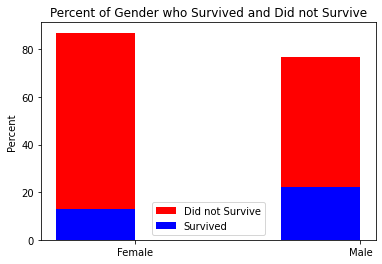

In [22]:
# Visuals
import matplotlib.pyplot as plt

#number of category values:
K = 2
nonsurvived = (87,77) #the percent values
survived =(13,22)
ins = numy.arange(K)
width = 0.35

fig, ax = plt.subplots()
bar_1= ax.bar(ins,nonsurvived, width, color ='r')
bar_2 = ax.bar(ins, survived, width, color = 'b')
ax.set_ylabel('Percent')
ax.set_title('Percent of Gender who Survived and Did not Survive')
ax.set_xticks(ins + width / 2)
ax.set_xticklabels(('Female', 'Male'))

ax.legend((bar_1[0], bar_2[0]), ('Did not Survive', 'Survived'))



Based the visual graph, it can be verified that there were a higher proportion of females that did not survive compared to that of male. This would provide justification regarding why the current probability of female survival is lower than male survival.






## Stretch Goals:

###1. Explore the concept of an odds ratio

Another way to quantify the relationship between two categorical variables is by calculating the odds ration, which is the ratio of the odds of an event happening in one group to the odds of the event happening in another group.

[Lots more about the odds ratio](https://en.wikipedia.org/wiki/Odds_ratio).

We can use Python to calculate the odds of surviving a slaser movie for female compared to male characters.

You can find more information about calculating the odds ratio for a 2x2 table in Python [here](https://www.statsmodels.org/stable/contingency_tables.html).  Scroll down to the section labeled "A Single 2x2 Table".

Calculate the odds ratio comparing the odds of movie survival in female compared to male characters.  Interpret what this number tells you about the likelihood of male and female characters surviving the film.


In [ ]:
# YOUR WORK HERE


Sum up your results in a sentence or two.


### 2. Learn about Simpson's Paradox

[Simpson's Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox#:~:text=Simpson's%20paradox%2C%20which%20goes%20by,when%20these%20groups%20are%20combined.) occurs when a trend that appears in separate groups disappears or reverses when those groups are combined.  

Create a scenario where Hopsital A has a lower overall mortality rate than Hospital B but has a higher mortality rate if cases are separated into two groups: high risk and low risk.


In [ ]:
# YOUR WORK HERE

Sum up your results in a sentence or two.